In [127]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
torch.manual_seed(3.14)
zh = mpl.font_manager.FontProperties("/usr/share/fonts/truetype/arphic/uming.ttc")
plt.style.use("seaborn")

In [2]:
from particle.nn.vaeThreeViews import VAE
vae = VAE(2)

In [3]:
state_dict = torch.load("./state_dict-2.tar")
vae.load_state_dict(state_dict["model_state_dict"])
vae.to("cpu")

VAE(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv5): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(4, 4), padding=(1, 1), bias=False)
    (1): 

In [4]:
projection_train = np.load("./projection_train.npy")
projection_test = np.load("./projection_test.npy")
projection_rest = np.load("./projection_rest.npy")

projection_train = torch.from_numpy(projection_train)
projection_test = torch.from_numpy(projection_test)
projection_rest = torch.from_numpy(projection_rest)

%matplotlib notebook
vae.eval()
with torch.no_grad():
    coding_train = vae.reparameterize(*vae.encoder(projection_train.to(torch.float32)))
    coding_test = vae.reparameterize(*vae.encoder(projection_test.to(torch.float32)))
    coding_rest = vae.reparameterize(*vae.encoder(projection_rest.to(torch.float32)))
    fig = plt.figure(dpi=100)
    ax = plt.axes(projection="3d")
    plt.plot(coding_train[:, 0], coding_train[:, 1], coding_train[:, 2], 'o', color="blue")
    plt.plot(coding_test[:, 0], coding_test[:, 1], coding_test[:, 2], 'o', color="green")
    plt.plot(coding_rest[:, 0], coding_rest[:, 1], coding_rest[:, 2], 'o', color="red")

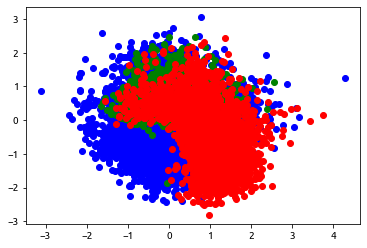

In [22]:
vae.eval()
with torch.no_grad():
    coding_train = vae.reparameterize(*vae.encoder(projection_train.to(torch.float32)))
    coding_test = vae.reparameterize(*vae.encoder(projection_test.to(torch.float32)))
    coding_rest = vae.reparameterize(*vae.encoder(projection_rest.to(torch.float32)))
    # fig = plt.figure(dpi=100)
    plt.plot(coding_train[:, 0], coding_train[:, 1], 'o', color="blue")
    plt.plot(coding_test[:, 0], coding_test[:, 1], 'o', color="green")
    plt.plot(coding_rest[:, 0], coding_rest[:, 1], 'o', color="red")

tensor(1) tensor(1692)


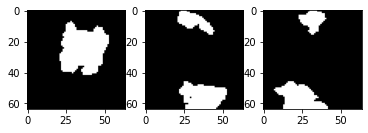

In [6]:
outlier = (3.5 < coding_rest[:, 0]) & (coding_rest[:, 0] < 4)
outlier = torch.as_tensor(outlier, dtype=int)
print(outlier.sum(), outlier.argmax())

img = projection_rest[outlier.argmax().item()].numpy()
fig, axes = plt.subplots(1, 3)
for i, ax in enumerate(axes):
    ax.imshow(img[i], cmap="gray")

dict_keys(['正三角形', '正方形', '正五边形', '心形', '菱形', '正六边形', '六角星', '长方形', '四角星', '弧形', '圆', '对钩', '箭形', '月亮', '五角星', '叉', '指向箭头', '多点星形'])


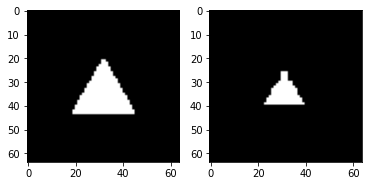

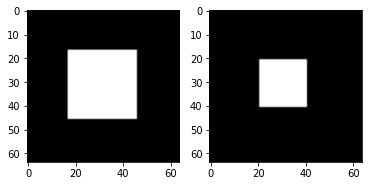

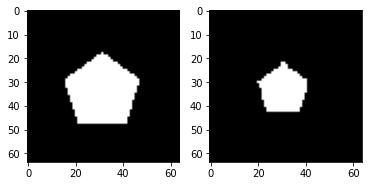

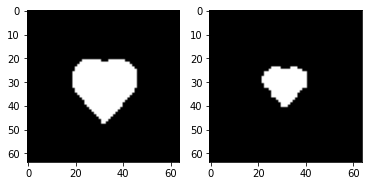

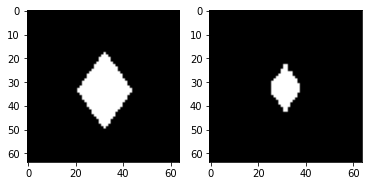

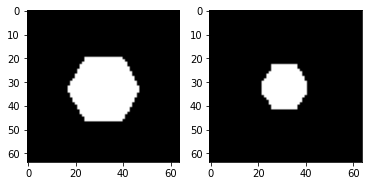

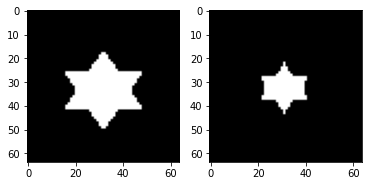

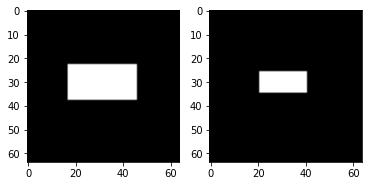

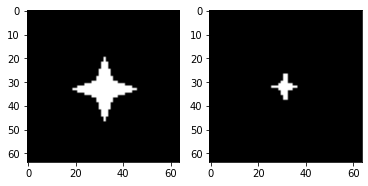

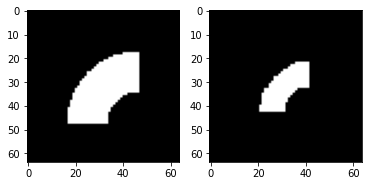

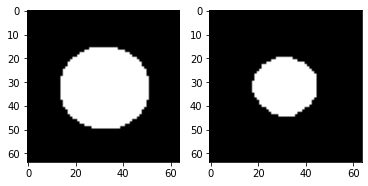

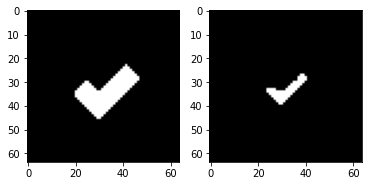

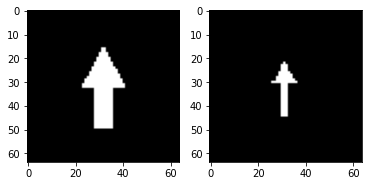

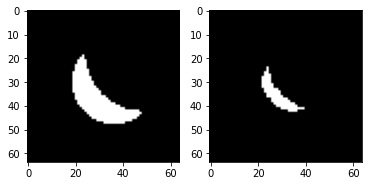

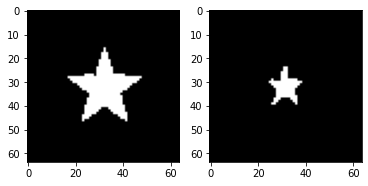

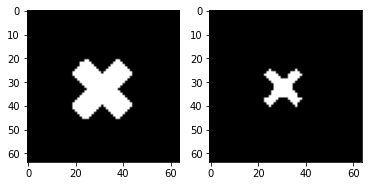

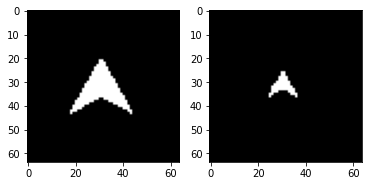

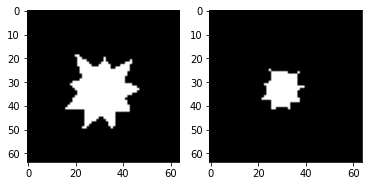

In [7]:
import os
from skimage import io, transform
cwd = os.getcwd()
os.chdir("/home/chuan/particle/data/简单几何图形/")
files = [name for name in os.listdir() if name.endswith(".png")]
files = {file[:-4]:io.imread(file) for file in files}
os.chdir(cwd)

# rescale the image body
scale_ratio = 0.8
for key in files.keys():
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(files[key], cmap="gray")
    tmp = np.full_like(files[key], 0)
    files[key] = transform.rescale(files[key], scale_ratio)
    x = y = (64 - files[key].shape[0]) // 2
    tmp[x:x+files[key].shape[1], y:y+files[key].shape[1]] = files[key]
    files[key] = tmp
    axes[1].imshow(files[key], cmap="gray")

simpleGraphs = np.empty((len(files), 3, 64, 64), dtype=np.uint8)
for i, img in enumerate(files.values()):
    simpleGraphs[i, 0] = img
    simpleGraphs[i, 1] = img
    simpleGraphs[i, 2] = img
simpleGraphs = torch.from_numpy(simpleGraphs)
print(files.keys())

['四角星' '对钩' '箭形' '月亮' '五角星' '指向箭头']


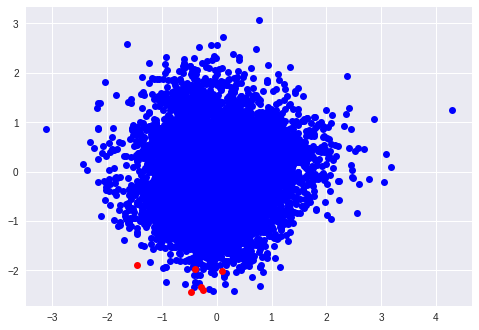

In [128]:
vae.eval()
torch.manual_seed(3.14)
with torch.no_grad():
    coding = vae.reparameterize(*vae.encoder(simpleGraphs.to(torch.float32)))
    # fig = plt.figure(dpi=100)
    plt.plot(coding_train[:, 0], coding_train[:, 1], 'o', color="blue")
    # plt.plot(coding_test[:, 0], coding_test[:, 1], 'o', color="green")
    # 明显偏离的点为[8, 11, 12, 13, 14, 16] # 15备选
    i = [8, 11, 12, 13, 14, 16]
    plt.plot(coding[i, 0], coding[i, 1], 'o', color="red")
    print(np.array(list(files.keys()))[i])
    plt.savefig("异常点.png", dpi=200)

In [87]:
outlierInd = torch.nonzero(coding[:, 0] < -1.5)
print(outlierInd)
for i, key in enumerate(files.keys()):
    if i in outlierInd:
        print(key)

tensor([[13]])
月亮


In [77]:
coding

tensor([[-0.5144, -1.7607],
        [-0.0183, -0.4413],
        [ 0.3551, -0.8159],
        [ 0.0611, -1.2741],
        [-0.0861, -1.8266],
        [ 0.3279, -0.9017],
        [-0.0407, -1.4916],
        [-0.2415, -1.2451],
        [-0.6195, -2.8833],
        [ 0.9674, -1.0509],
        [ 0.1688, -0.1273],
        [-0.7880, -2.3271],
        [ 1.2994, -2.1976],
        [-1.2405, -1.9944],
        [-0.2436, -1.8899],
        [ 0.0907, -1.7960],
        [-0.0396, -2.3916],
        [-0.2020, -1.4963]])